# Load CSV Data
You need to configure Jupyter and Ipython to run spark-shell at startup.

The shell will configure the spark context and import the dependancies.

In [51]:
spark_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true').load(path='/home/yacine/moocs/UW_ML_Case_Study/w1/people-example.csv', inferSchema=False)

In [52]:
spark_df.show() # This will show the 20 twenty lines
#no tail() for Spark (Think Big Data)

+----------+---------+-------------+---+
|First Name|Last Name|      Country|age|
+----------+---------+-------------+---+
|       Bob|    Smith|United States| 24|
|     Alice| Williams|       Canada| 23|
|   Malcolm|     Jone|      England| 22|
|     Felix|    Brown|          USA| 23|
|      Alex|   Cooper|       Poland| 23|
|       Tod| Campbell|United States| 22|
|     Derek|     Ward|  Switzerland| 25|
+----------+---------+-------------+---+



# By defalut column types are String
This can be changed by using

inferSchema=True in "load"

cast the column using "astype"

In [53]:
spark_df.columns
spark_df.printSchema()

root
 |-- First Name: string (nullable = true)
 |-- Last Name: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- age: string (nullable = true)



In [54]:
spark_df.schema
spark_df = spark_df.withColumn('age', spark_df['age'].astype('int'))
spark_df.show()
spark_df.schema

+----------+---------+-------------+---+
|First Name|Last Name|      Country|age|
+----------+---------+-------------+---+
|       Bob|    Smith|United States| 24|
|     Alice| Williams|       Canada| 23|
|   Malcolm|     Jone|      England| 22|
|     Felix|    Brown|          USA| 23|
|      Alex|   Cooper|       Poland| 23|
|       Tod| Campbell|United States| 22|
|     Derek|     Ward|  Switzerland| 25|
+----------+---------+-------------+---+



StructType(List(StructField(First Name,StringType,true),StructField(Last Name,StringType,true),StructField(Country,StringType,true),StructField(age,IntegerType,true)))

In [55]:
spark_df.describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|                 7|
|   mean|23.142857142857142|
| stddev|0.9897433186107893|
|    min|                22|
|    max|                25|
+-------+------------------+



# Histogram

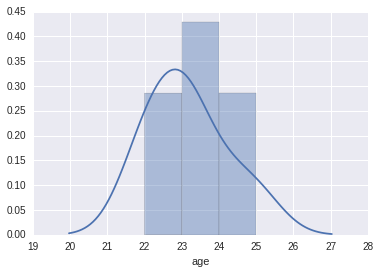

In [56]:
%matplotlib inline
import seaborn as sb

sb.distplot(spark_df.toPandas().age)

# Some Statistics

In [57]:
from pyspark.sql.functions import mean, min, max
spark_df.select([min('age'), mean('age'),max('age')]).show()

+--------+------------------+--------+
|min(age)|          avg(age)|max(age)|
+--------+------------------+--------+
|      22|23.142857142857142|      25|
+--------+------------------+--------+



In [58]:
print spark_df.rdd.map(lambda e: e.age).mean()

23.1428571429


# Manipulate/ Create Columns

Use user defined function (the equivalent of "apply()"

use "withColumn()"

In [59]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

transform_country = udf(lambda country: 'United States' if country == 'USA' else country, StringType())
spark_df.withColumn('Country', transform_country(spark_df['Country'])).show()

+----------+---------+-------------+---+
|First Name|Last Name|      Country|age|
+----------+---------+-------------+---+
|       Bob|    Smith|United States| 24|
|     Alice| Williams|       Canada| 23|
|   Malcolm|     Jone|      England| 22|
|     Felix|    Brown|United States| 23|
|      Alex|   Cooper|       Poland| 23|
|       Tod| Campbell|United States| 22|
|     Derek|     Ward|  Switzerland| 25|
+----------+---------+-------------+---+

